$\Huge{\text{Linear Regression}}$

$\Large{\text{More examples}}$


In this session, we shall learn about some limitations of linear regression. 

Let us first consider a sample data, which will be useful for our study. 

In [ ]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes
import numpy as np 

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

We will consider data generated by $y=x^2$ where $x$ denotes certain points in interval $[0,5]$. 

In [ ]:
x = np.arange(0,5,0.1)
y = x**2

print('x:',x)
print('y:',y)

sample_data = [(x,y) for (x,y) in zip(x,y)]
print('sample data:',sample_data)

column_names = ['X','Y']

sample_df = pd.DataFrame(data = sample_data, 
                  columns = column_names)

x: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
y: [0.000e+00 1.000e-02 4.000e-02 9.000e-02 1.600e-01 2.500e-01 3.600e-01
 4.900e-01 6.400e-01 8.100e-01 1.000e+00 1.210e+00 1.440e+00 1.690e+00
 1.960e+00 2.250e+00 2.560e+00 2.890e+00 3.240e+00 3.610e+00 4.000e+00
 4.410e+00 4.840e+00 5.290e+00 5.760e+00 6.250e+00 6.760e+00 7.290e+00
 7.840e+00 8.410e+00 9.000e+00 9.610e+00 1.024e+01 1.089e+01 1.156e+01
 1.225e+01 1.296e+01 1.369e+01 1.444e+01 1.521e+01 1.600e+01 1.681e+01
 1.764e+01 1.849e+01 1.936e+01 2.025e+01 2.116e+01 2.209e+01 2.304e+01
 2.401e+01]
sample data: [(0.0, 0.0), (0.1, 0.010000000000000002), (0.2, 0.04000000000000001), (0.30000000000000004, 0.09000000000000002), (0.4, 0.16000000000000003), (0.5, 0.25), (0.6000000000000001, 0.3600000000000001), (0.7000000000000001, 0.4900000000000001), (0.8, 0.6400000000000001), (0


The data set contains a predictor and response variable.

In [ ]:
#Let us explore the data and the description 


#print the first few rows of the data 
sample_df.head()


,X,Y
0,0.0,0.00
1,0.1,0.01
2,0.2,0.04
3,0.3,0.09
4,0.4,0.16


In [ ]:
#if you wish to print the entire data, then use the following
print(sample_df)

      X      Y
0   0.0   0.00
1   0.1   0.01
2   0.2   0.04
3   0.3   0.09
4   0.4   0.16
5   0.5   0.25
6   0.6   0.36
7   0.7   0.49
8   0.8   0.64
9   0.9   0.81
10  1.0   1.00
11  1.1   1.21
12  1.2   1.44
13  1.3   1.69
14  1.4   1.96
15  1.5   2.25
16  1.6   2.56
17  1.7   2.89
18  1.8   3.24
19  1.9   3.61
20  2.0   4.00
21  2.1   4.41
22  2.2   4.84
23  2.3   5.29
24  2.4   5.76
25  2.5   6.25
26  2.6   6.76
27  2.7   7.29
28  2.8   7.84
29  2.9   8.41
30  3.0   9.00
31  3.1   9.61
32  3.2  10.24
33  3.3  10.89
34  3.4  11.56
35  3.5  12.25
36  3.6  12.96
37  3.7  13.69
38  3.8  14.44
39  3.9  15.21
40  4.0  16.00
41  4.1  16.81
42  4.2  17.64
43  4.3  18.49
44  4.4  19.36
45  4.5  20.25
46  4.6  21.16
47  4.7  22.09
48  4.8  23.04
49  4.9  24.01


Seeing the data as mere numbers might not be interesting. So, let us use some graphical ways to visualize the data. 

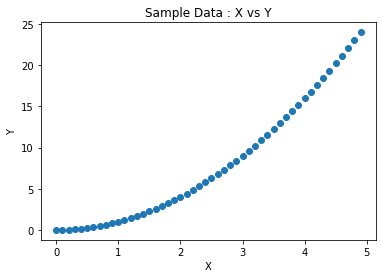

In [ ]:
#We will plot a scatter plot of the data

plt.scatter(sample_df['X'], sample_df['Y'])
plt.title("Sample Data : X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

$\large{\text{Question:}}$ Is the trend linear (or) at least linear looking? 

$\Large{\text{Computing } \beta_0, \beta_1 \text{ for the Anscombe data set 2}}:$

In [ ]:
#Let us now compute beta_0 and beta_1 from the anscombe data set 2
n = len(sample_df.index) #number of data points in the data set
print('number of data points in the data set:',n)

number of data points in the data set: 50


In [ ]:
#First let us compute x_bar and y_bar 
x_bar = 0 
y_bar = 0

for i in range(n): #access each row from the data set 
  x_bar += float(sample_df.iat[i,0]) #access element at X column
  y_bar += float(sample_df.iat[i,1]) #access element at Y column
x_bar /= n
y_bar /= n
print('x bar:',x_bar, 'y bar:',y_bar)

x bar: 2.45 y bar: 8.085


In [ ]:
#Then we will compute Sigma_XX and Sigma_XY 
sigma_xx = 0
sigma_xy = 0

for i in range(n): #access each row from the data set 
  sigma_xx += (float(sample_df.iat[i,0]) - x_bar)**2 #computing (x^i - x_bar)^2 
  sigma_xy += (float(sample_df.iat[i,0]) - x_bar) * (float(sample_df.iat[i,1])-y_bar) #computing (x^i - x_bar)(y^i-y_bar)
print('sigma_xx:',sigma_xx, 'sigma_xy:',sigma_xy)

sigma_xx: 104.12500000000001 sigma_xy: 510.21250000000026


In [ ]:
#Now we can compute beta_0 and beta_1
beta_1 = sigma_xy/sigma_xx
beta_0 = y_bar - beta_1* x_bar 

print('beta_0:', beta_0, 'beta_1', beta_1)


beta_0: -3.9200000000000053 beta_1 4.900000000000002


$\Large{\text{Plotting the regression line}}$
 
Having computed $\beta_0$ and $\beta_1$, we will now plot the line $y=\beta_1 x + \beta_0$ along with the points in the data set. 

In [ ]:
#compute the left and right limits of the x-axis
x_min = 9999
x_max = -9999

for i in range(n): #access each row from the data set 
  x_i = float(sample_df.iat[i,0]) #access element at X column
  if x_i > x_max:
    x_max = x_i 
  if x_i < x_min:
    x_min = x_i

x_min = x_min - 1
x_max = x_max + 1 

print('x_min:',x_min,'x_max:',x_max)




x_min: -1.0 x_max: 5.9


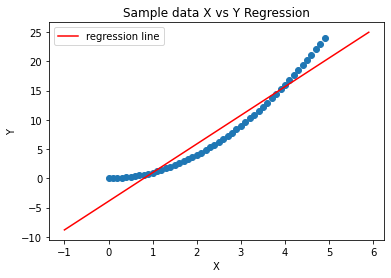

In [ ]:
import numpy as np
x = np.linspace(x_min,x_max,100) #creates a series of points in x axis
y = beta_1*x+beta_0
plt.plot(x, y, '-r', label='regression line')
plt.scatter(sample_df['X'], sample_df['Y'])

plt.title("Sample data X vs Y Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper left')
#plt.grid()
plt.show()

$\Large{\text{Residual Plot}}$

Sometimes it would be useful to plot the error (or) $\textbf{residual}$ $e^i$ versus the fitted values $\hat{y}^i=\beta_1 x^i + \beta_0$.  

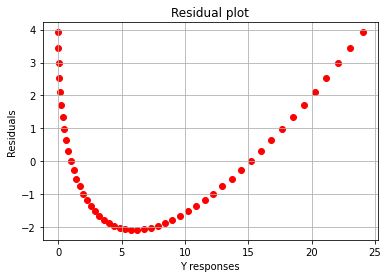

In [ ]:
e_i_residuals_list = [] 
for i in range(n): #access each row from the data set 
  x_i = float(sample_df.iat[i,0]) #access element at X column
  y_i = float(sample_df.iat[i,1]) #access element at Y column

  y_pred_i = beta_1 * x_i + beta_0 #compute the prediction obtained using the regression coefficients 
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  e_i_residuals_list.append(e_i) #append the value of e_i to the list 

#plot the residuals e_i against the actual observations y_i
plt.scatter(sample_df['Y'], e_i_residuals_list,color='r')
plt.title("Residual plot")
plt.xlabel("Y responses")
plt.ylabel("Residuals")
plt.grid()
plt.show()

Note that the residual vs response plot shows a significant trend of residual behavior as $y$ varies. 

#Residue vs Predictor Plot

Let us plot the residue vs predictor.

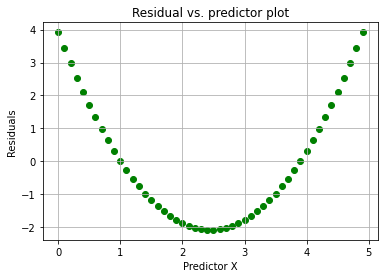

In [ ]:
#plot the residuals e_i against the predictors x_i
plt.scatter(sample_df['X'], e_i_residuals_list,color='g')
plt.title("Residual vs. predictor plot")
plt.xlabel("Predictor X")
plt.ylabel("Residuals")
plt.grid()
plt.show()

Note that the residual vs predictor plot also shows a significant trend of residual behavior as $x$ varies. This indicates that the linear model assumption used to fit the data might not be a good assumption.

Let us now compute the sample correlation.

In [ ]:
#Note that sigma_XY and sigma_XX have already been computed. 
#Hence we will now compute sigma_YY

#Also note that y_bar is computed before

sigma_yy = 0
for i in range(n): #access each row from the data set 
  y_i = float(sample_df.iat[i,1]) #access element at Y column
  sigma_yy += (y_i-y_bar)**2

print('sigma_yy:', sigma_yy)

#Then we will compute the sample correlation
sample_correlation = sigma_xy/(np.sqrt(sigma_xx * sigma_yy))
print('sample correlation:',sample_correlation)

sigma_yy: 2673.305250000001
sample correlation: 0.9670508513356978


Let us compute $R^2$. 

In [ ]:
#Note that sum of squared residuals needs to be computed 

sum_sq_residuals = 0
for i in range(n): #access each row from the data set 
  x_i = float(sample_df.iat[i,0]) #access element at X column
  y_i = float(sample_df.iat[i,1]) #access element at Y column
  y_pred_i = beta_1*x_i + beta_0
  sum_sq_residuals += (y_i-y_pred_i)**2

print('sum of squared residuals:', sum_sq_residuals)

#Then we will compute the R^2 quantity
R_sq = 1-sum_sq_residuals/sigma_yy
print('R^2:',R_sq)

sum of squared residuals: 173.2640000000001
R^2: 0.9351873490690972


#Note: 
The $R^2$ value is quite high which might seem to indicate that the fit is good enough. However taken together with residual plots, we see that despite having good $R^2$ value, the linear model assumption is questionable.

$\Large{\text{Exercises:}}$


1.   Try to generate data sets  $y=x^3$, $y=\sin \frac{\pi x}{2}$, $y=\cos \frac{\pi x}{2}$ where $x \in [-5,5]$ and find the linear regression model $y=\beta_0 + \beta_1x $ for these data sets and check correlation coefficient, $R^2$ and residual plots.Summarize your findings.  

2. Try to generate data sets $y=1+3x + ax^2$ with $a \in \{0.001,0.01,0.1,1,10,100,1000\}$. For each $a$, find the linear regression model and check $\beta_0, \beta_1$, correlation coefficient modeled using $y=\beta_0 + \beta_1x $, find $R^2$ and residual plots. Explain your findings. 

